In [1]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json
pd.set_option("display.max_colwidth", None)


%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

In [2]:

import tweepy

In [3]:
import json
key_file = 'keys.json'

with open(key_file) as f:
    keys = json.load(f)


In [4]:
import tweepy
from tweepy import TweepError
import logging

try:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    print("Your username is:", api.auth.get_username())
except TweepError as e:
    logging.warning("There was a Tweepy error. Double check your API keys and try again.")
    logging.warning(e)

Your username is: wwwdotco


In [5]:
from pathlib import Path
import json

ds_tweets_save_path = "RutgersU_recent_tweets.json"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, id="RutgersU", 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

In [6]:
from pathlib import Path
import json

def load_keys(path):
    """Loads your Twitter authentication keys from a file on disk.
    
    Args:
        path (str): The path to your key file.  The file should
          be in JSON format and look like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }
    
    Returns:
        dict: A dictionary mapping key names (like "consumer_key") to
          key values."""
    
    ds_tweets_save_path = path 
    with open(ds_tweets_save_path) as f:
        data=f.readlines()
        

    
    return keys


In [7]:
def download_recent_tweets_by_user(user_account_name, keys):
    """Downloads tweets by one Twitter user.

    Args:
        user_account_name (str): The name of the Twitter account
          whose tweets will be downloaded.
        keys (dict): A Python dictionary with Twitter authentication
          keys (strings), like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }

    Returns:
        list: A list of Dictonary objects, each representing one tweet."""
    import tweepy
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)

    return list(tweepy.Cursor(api.user_timeline, id=user_account_name).items())

    
    


In [8]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import pickle
        return pickle.load(f)

In [9]:
def save_tweets(tweets, path):
    """Saves a list of tweets to a file in the local filesystem.
    
    This function makes no guarantee about the format of the saved
    tweets, **except** that calling load_tweets(path) after
    save_tweets(tweets, path) will produce the same list of tweets
    and that only the file at the given path is used to store the
    tweets.  (That means you can implement this function however
    you want, as long as saving and loading works!)

    Args:
        tweets (list): A list of tweet objects (of type Status) to
          be saved.
        path (str): The place where the tweets will be saved.

    Returns:
        None"""
    with open(path, "wb") as f:
        import pickle
        pickle.dump(tweets, f)

In [10]:
def get_tweets_with_cache(user_account_name, keys_path):
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    """
    
    
    save_path = "{}_recent_tweets.pk1".format(user_account_name)
    from pathlib import Path
    if not Path(save_path).is_file():
        keys = load_keys(keys_path)
        tweets = download_recent_tweets_by_user(user_account_name, keys)
        save_tweets(tweets, save_path)
    return load_tweets(save_path)
   
    
    


In [11]:
test_tweet = get_tweets_with_cache("accuweather", "keys.json")

In [12]:
test_tweet[0]

Status(_json={'created_at': 'Wed Jun 09 01:32:00 +0000 2021', 'id': 1402438297222369282, 'id_str': '1402438297222369282', 'text': "AccuWeather's @adamdweather Adam Del Rosso interviewed @NASA research scientist Dr. Patrick Duran about using light… https://t.co/cp4sJGKLgQ", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'AdamDWeather', 'name': 'Adam Del Rosso', 'id': 542949053, 'id_str': '542949053', 'indices': [14, 27]}, {'screen_name': 'NASA', 'name': 'NASA', 'id': 11348282, 'id_str': '11348282', 'indices': [55, 60]}], 'urls': [{'url': 'https://t.co/cp4sJGKLgQ', 'expanded_url': 'https://twitter.com/i/web/status/1402438297222369282', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://sproutsocial.com" rel="nofollow">Sprout Social</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': 

In [13]:
def extract_text(tweet):
    return tweet.text 

def extract_time(tweet):
    return tweet.created_at 
def extract_id(tweet):
    return tweet.id_str 
def extract_source(tweet):
    return tweet.source 
def extract_rt(tweet):
    return tweet.retweet_count 

def make_dataframe(tweets):
    """Make a DataFrame from a list of tweets, with a few relevant fields.
    
    Args:
        tweets (list): A list of tweets, each one a Status object.
    
    Returns:
        DataFrame: A Pandas DataFrame containing one row for each element
          of tweets and one column for each relevant field."""
    df = pd.DataFrame() 
    df['text'] = [extract_text(t) for t in tweets]
    df['created_at'] = [extract_time(t) for t in tweets] 
    df['source'] = [extract_source(t) for t in tweets] 
    df['id'] = [extract_id(t) for t in tweets] 
    df['retweet_count'] = [extract_rt(t) for t in tweets]
    return df
df = make_dataframe(test_tweet)


In [14]:
tweet_df = df.set_index('id')
tweet_df

,text,created_at,source,retweet_count
id,,,,
1402438297222369282,AccuWeather's @adamdweather Adam Del Rosso interviewed @NASA research scientist Dr. Patrick Duran about using light… https://t.co/cp4sJGKLgQ,2021-06-09 01:32:00,Sprout Social,2
1402429993192464384,"On May 26, the moon passed through Earth’s shadow during a lunar eclipse, and on Thursday, the roles will be revers… https://t.co/TZmj0A1JIB",2021-06-09 00:59:00,Sprout Social,6
1402422948485648391,"Daily #coronavirus briefing: ""Joints for Jabs,"" Canada's potential border reopening, and the resurrection of Madiso… https://t.co/uV2FJvoEsf",2021-06-09 00:31:01,Sprout Social,1
1402415175764959236,"It doesn't look like this motorist will cross this roadway in LeFlore County, Oklahoma. Watch how it turned into a… https://t.co/vwFsJdN8Fa",2021-06-09 00:00:08,Sprout Social,1
1402407605633441792,The chances of the development of a tropical depression or storm will grow in mid- to late June. Additional disturb… https://t.co/3ZeHUzdaI0,2021-06-08 23:30:03,Sprout Social,4
...,...,...,...,...
1383027504571629570,"It is one of the most ambitious clean energy plans in the country, but some say the transition will actually cause… https://t.co/TCTvFgzeud",2021-04-16 12:00:27,Sprout Social,0
1382997250830438401,Favorable weather is in the forecast for many areas of North America as the first meteor shower since January reach… https://t.co/05fh9f10qd,2021-04-16 10:00:14,Sprout Social,3
1382967059471040513,"You'd expect to capture some spectacular images on camera if you're kayaking at a glacier lake in Nepal, but one gr… https://t.co/LjRz7pDB0W",2021-04-16 08:00:15,Sprout Social,4


In [15]:
tweet_df['source'].unique()

array(['Sprout Social', 'TweetDeck', 'Twitter Web App',
       'Twitter for Android', 'Twitter for iPhone'], dtype=object)

<b>The most common device types used in accessing twitter</b>

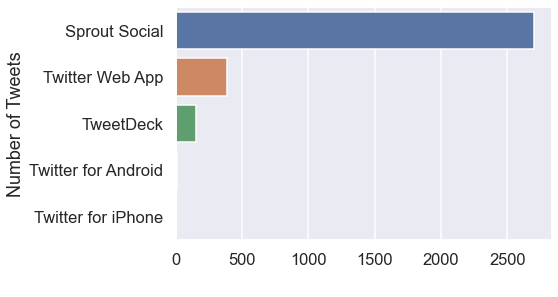

In [16]:
ax = sns.countplot(y=tweet_df['source'], data=tweet_df, order = tweet_df['source'].value_counts().index)
ax.set(ylabel ="Number of Tweets", xlabel =" ")
sns.set(rc={'figure.figsize':(11,8)})

In [17]:
tweet_df["created_at"] = pd.to_datetime(tweet_df["created_at"])
tweet_df= tweet_df.rename(columns={"created_at": "time"}, errors="raise")


tweet_df.head()

,text,time,source,retweet_count
id,,,,
1402438297222369282,AccuWeather's @adamdweather Adam Del Rosso interviewed @NASA research scientist Dr. Patrick Duran about using light… https://t.co/cp4sJGKLgQ,2021-06-09 01:32:00,Sprout Social,2
1402429993192464384,"On May 26, the moon passed through Earth’s shadow during a lunar eclipse, and on Thursday, the roles will be revers… https://t.co/TZmj0A1JIB",2021-06-09 00:59:00,Sprout Social,6
1402422948485648391,"Daily #coronavirus briefing: ""Joints for Jabs,"" Canada's potential border reopening, and the resurrection of Madiso… https://t.co/uV2FJvoEsf",2021-06-09 00:31:01,Sprout Social,1
1402415175764959236,"It doesn't look like this motorist will cross this roadway in LeFlore County, Oklahoma. Watch how it turned into a… https://t.co/vwFsJdN8Fa",2021-06-09 00:00:08,Sprout Social,1
1402407605633441792,The chances of the development of a tropical depression or storm will grow in mid- to late June. Additional disturb… https://t.co/3ZeHUzdaI0,2021-06-08 23:30:03,Sprout Social,4


<b>Sentiment Analysis</b>

In [18]:
data = pd.read_csv("vader_lexicon.txt",delimiter='\t',header=None)
df_sent = pd.DataFrame()
df_sent['polarity']=data[1]
df_sent['token']=data[0]
df_sent= df_sent.set_index('token')
df_sent = df_sent.groupby('token').mean()
df_sent

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7
...,...
}:,-2.1
}:(,-2.0
}:),0.4


In [19]:
tweet_df['text'] = tweet_df['text'].str.lower()

In [20]:
# Save your regex in punct_re
punct_re = r'[^\w\s\\n]'
url_re = '^https?:\/\/.*[\r\n]*'

regex = re.compile(punct_re, flags=re.IGNORECASE)
tweet_df['no_punc'] = tweet_df['text'].replace(regex, ' ')





In [21]:
tweet_df['no_punc'] = tweet_df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

Converting the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate.

In [22]:
tidy_format  = tweet_df['no_punc'].str.split(expand=True).stack().to_frame().reset_index()
tidy_format  = tidy_format .rename(columns={'level_1': 'num', 0: 'word'})
tidy_format = tidy_format.set_index("id") 
tidy_format

,num,word
id,,
1402438297222369282,0,accuweather's
1402438297222369282,1,@adamdweather
1402438297222369282,2,adam
1402438297222369282,3,del
1402438297222369282,4,rosso
...,...,...
1382906615888801793,15,seas.
1382906615888801793,16,but
1382906615888801793,17,the


In [23]:
df_merged = pd.merge(tweet_df, tidy_format, left_index = True, right_index=True)
df_merged = pd.merge(df_merged, df_sent, left_on='word', right_index=True)
df_merged_ri = df_merged.reset_index()
df_merged_ri = df_merged_ri.groupby("id")["polarity"].sum()
df_merged_ri =df_merged_ri.to_frame()
tweet_df['polarity'] = df_merged_ri["polarity"]
tweet_df

,text,time,source,retweet_count,no_punc,polarity
id,,,,,,
1402438297222369282,accuweather's @adamdweather adam del rosso interviewed @nasa research scientist dr. patrick duran about using light… https://t.co/cp4sjgklgq,2021-06-09 01:32:00,Sprout Social,2,accuweather's @adamdweather adam del rosso interviewed @nasa research scientist dr. patrick duran about using light…,NaN
1402429993192464384,"on may 26, the moon passed through earth’s shadow during a lunar eclipse, and on thursday, the roles will be revers… https://t.co/tzmj0a1jib",2021-06-09 00:59:00,Sprout Social,6,"on may 26, the moon passed through earth’s shadow during a lunar eclipse, and on thursday, the roles will be revers…",NaN
1402422948485648391,"daily #coronavirus briefing: ""joints for jabs,"" canada's potential border reopening, and the resurrection of madiso… https://t.co/uv2fjvoesf",2021-06-09 00:31:01,Sprout Social,1,"daily #coronavirus briefing: ""joints for jabs,"" canada's potential border reopening, and the resurrection of madiso…",NaN
1402415175764959236,"it doesn't look like this motorist will cross this roadway in leflore county, oklahoma. watch how it turned into a… https://t.co/vwfsjdn8fa",2021-06-09 00:00:08,Sprout Social,1,"it doesn't look like this motorist will cross this roadway in leflore county, oklahoma. watch how it turned into a…",1.5
1402407605633441792,the chances of the development of a tropical depression or storm will grow in mid- to late june. additional disturb… https://t.co/3zehuzdai0,2021-06-08 23:30:03,Sprout Social,4,the chances of the development of a tropical depression or storm will grow in mid- to late june. additional disturb…,-1.9
...,...,...,...,...,...,...
1383027504571629570,"it is one of the most ambitious clean energy plans in the country, but some say the transition will actually cause… https://t.co/tctvfgzeud",2021-04-16 12:00:27,Sprout Social,0,"it is one of the most ambitious clean energy plans in the country, but some say the transition will actually cause…",4.9
1382997250830438401,favorable weather is in the forecast for many areas of north america as the first meteor shower since january reach… https://t.co/05fh9f10qd,2021-04-16 10:00:14,Sprout Social,3,favorable weather is in the forecast for many areas of north america as the first meteor shower since january reach…,2.1
1382967059471040513,"you'd expect to capture some spectacular images on camera if you're kayaking at a glacier lake in nepal, but one gr… https://t.co/ljrz7pdb0w",2021-04-16 08:00:15,Sprout Social,4,"you'd expect to capture some spectacular images on camera if you're kayaking at a glacier lake in nepal, but one gr…",NaN


Most Negative Tweet

In [24]:


min_val = tweet_df["polarity"].min()
df_temp = tweet_df.loc[tweet_df["polarity"] == min_val]
print('Most negative tweets: ')

negative = df_temp["text"].to_frame().drop_duplicates()
pd.set_option("display.max_colwidth", None)
with pd.option_context('display.max_colwidth', 1000):
    temptext=negative["text"][0]
    print(temptext)

Most negative tweets: 
nearly 24 million are facing a slight risk of severe weather on wednesday as the threat for damaging storms expands… https://t.co/2l26r4uzxw


Most positive tweet

In [25]:
max_val = tweet_df["polarity"].max()
df_temp = tweet_df.loc[tweet_df["polarity"] == max_val]
print('Most positive tweets:')
positive = df_temp["text"].to_frame().drop_duplicates()
with pd.option_context('display.max_colwidth', 1000):
    temptext=positive["text"][0]
    print(temptext)

Most positive tweets:
@forrestlself hope you're staying warm! where was this taken? love the video! we'd love to share it with credit on… https://t.co/xzmg3n5y3y


Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains string 1 or string 2. Replace the words storm and sun with whatever two strings you want to compare.


[Text(0, 0.5, 'Density'), Text(0.5, 0, '')]

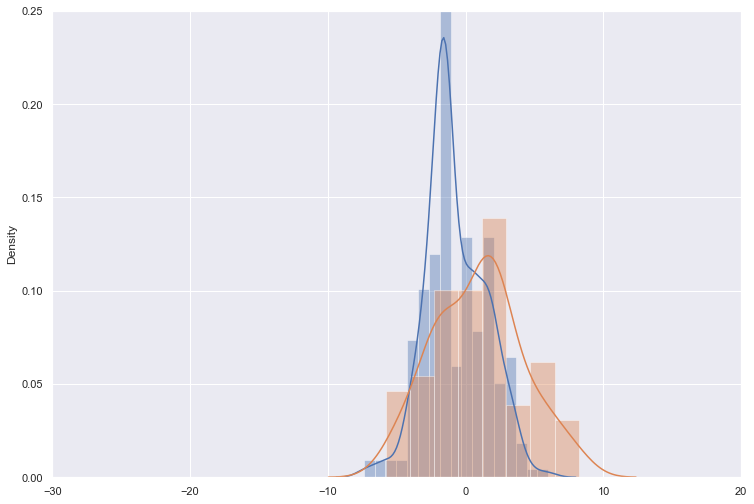

In [26]:
nyt =tweet_df[tweet_df['no_punc'].str.contains("storm") ]
fox =tweet_df[tweet_df['no_punc'].str.contains("sun") ]
ax =sns.distplot(nyt['polarity'], hist=True, rug=False)
ax =sns.distplot(fox['polarity'], hist=True, rug=False)
plt.ylim(0, 0.25)
plt.xlim(-30, 20)
ax.set(ylabel ="Density", xlabel ="")

## Principal Component Analysis (PCA) and Twitter

The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, we parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc)


In [27]:
## code to plot the first 10 rows of the matrix
import nltk
import nltk.corpus
nltk.download('stopwords')
nltk.download('wordnet')



#create a dataframe called tmp to store all words appear in the tweets
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
tmp = pd.DataFrame()
tmp['word'] = tidy_format['word']

tmp = tmp.reset_index()


#remove stopwords
df_no_stop = df_merged[~df_merged['word'].isin(stop_words)]

#deal with plurals
df_lem = pd.DataFrame(df_no_stop)
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
df_lem['word'] = df_lem['word'].apply(lambda s: lemmatizer.lemmatize(s))


# Remove numbers
df_clean = pd.DataFrame(df_lem)
df_clean = df_clean[~(df_clean['word'].str.isnumeric())]
#Remove words with only 1 or 2 length

tmp = df_clean[df_clean['word'].str.len() > 2] 




words = tmp['word'].value_counts(ascending=False)

words = words.reset_index()['index'][:50].to_list()

w_to_idx = {}
for i in range(len(words)):
    w_to_idx[words[i]] = i
    
X = np.zeros((5000, 50))


selected_tweets = tmp.index.unique()[:5000]





for i in range(1000):
    tmp_i = tmp.loc[[selected_tweets[i]]]
    for j in range(len(tmp_i)):
       
        if tmp_i.iloc[j]['word'] in words:
            X[i, w_to_idx[tmp_i.iloc[j]['word']]] += 1
X[:10]




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rouse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rouse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [28]:

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

[[ 9.80539006e-01 -8.09250183e-02 -9.24288597e-02 ... -2.21245293e-03
  -2.73849253e-03 -1.69310521e-03]
 [ 5.49590324e-02  9.64785286e-01 -2.39133430e-01 ...  2.17661263e-02
   5.76930815e-03 -1.48309017e-03]
 [ 1.09126789e-01  2.31994078e-01  9.60161973e-01 ...  3.96002723e-03
  -1.72247827e-03 -2.68307188e-03]
 ...
 [ 5.54216980e-05  9.91496976e-04  2.39259279e-04 ... -6.87042778e-04
  -1.77394162e-04 -1.52123770e-03]
 [-0.00000000e+00 -2.97828032e-18 -2.97331317e-20 ...  4.98139020e-17
  -1.22171673e-16 -1.18511943e-16]
 [ 0.00000000e+00  3.47709225e-18 -3.11357034e-18 ... -3.75429264e-17
  -9.58534782e-17  6.31752737e-17]]
[3.48492803e-02 2.65093920e-02 2.50306364e-02 9.87875999e-03
 7.78087335e-03 6.72504352e-03 6.60183794e-03 6.21271524e-03
 5.80466930e-03 5.71612615e-03 5.57950343e-03 5.04428850e-03
 5.02901818e-03 4.50812613e-03 4.40721588e-03 4.37395539e-03
 4.31054070e-03 4.11502573e-03 3.98752628e-03 3.85791774e-03
 3.82244838e-03 3.63471090e-03 3.40623434e-03 3.29428689e-0

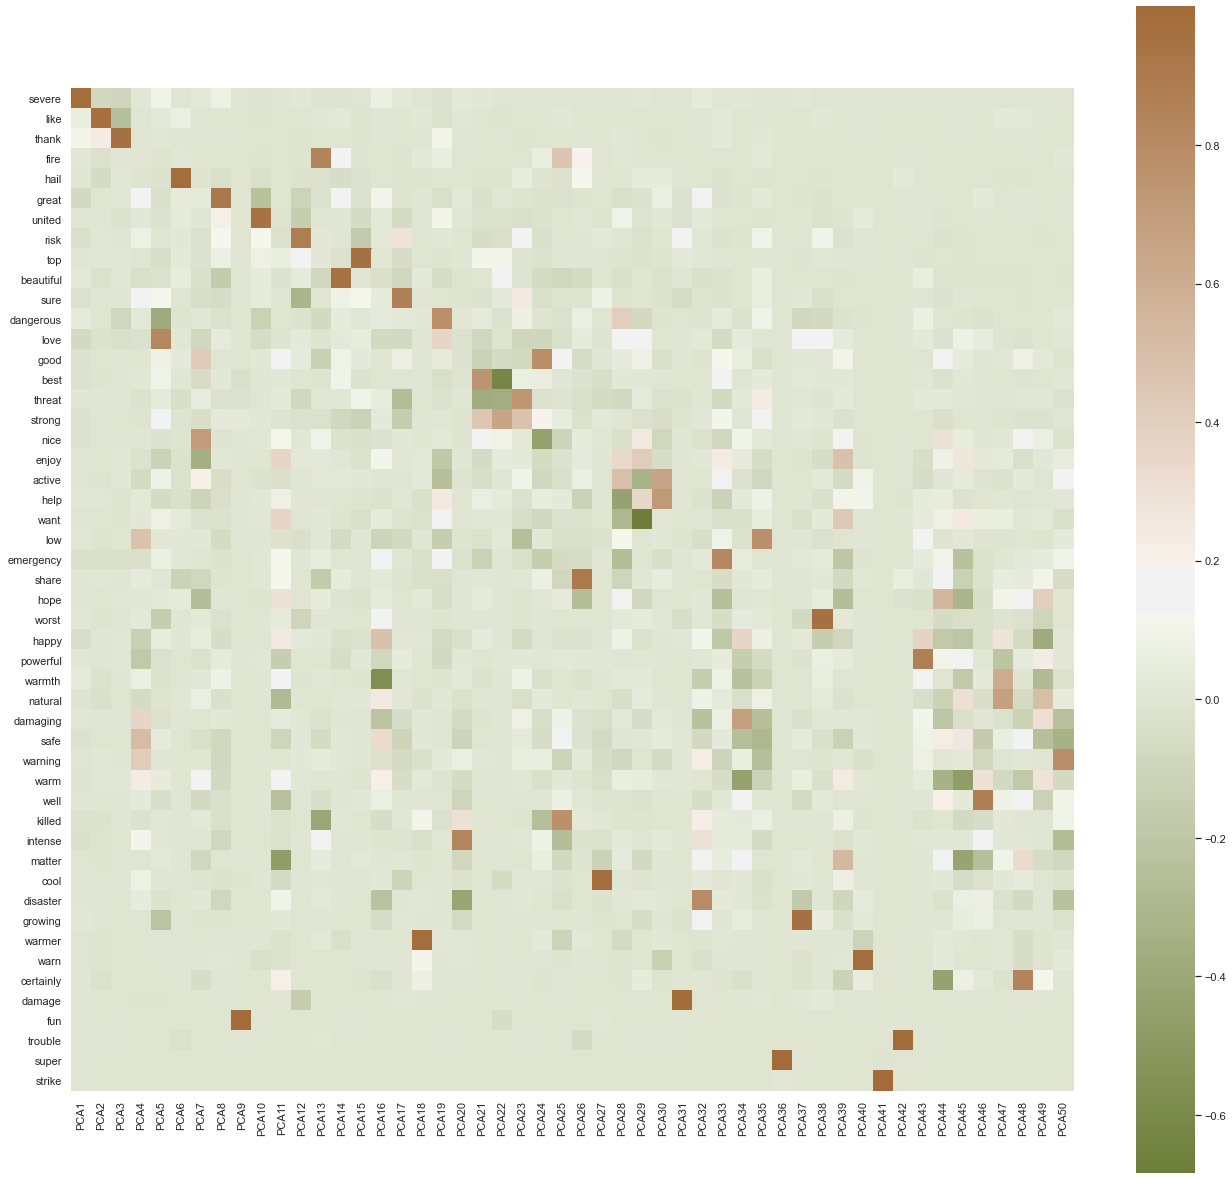

In [29]:
fig = plt.figure(figsize=(20,20))

ax = sns.heatmap(pca.components_,
                 cmap=sns.diverging_palette(100, 400,as_cmap=True),
                 xticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 yticklabels=list(words),
                 cbar_kws={"orientation": "vertical"})
ax.set_aspect("equal")



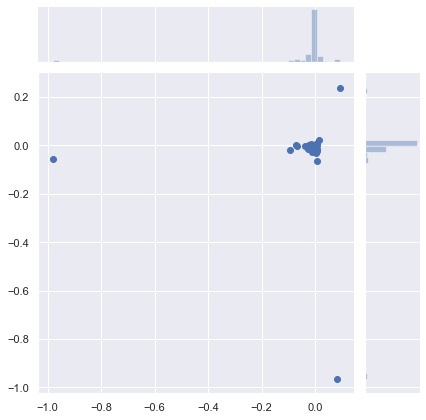

In [30]:
mu = X.mean(axis=0)

X_ = X - mu

Sigma = X_.T @ X_ / len(X_)

import scipy.linalg as linalg
u, lam, uh = linalg.svd(Sigma)
pca1 = u[:,0]
pca2 = u[:,1]


sns.jointplot(pca1,pca2)

## Twitter Engagement

Heer, we'll explore which words led to a greater average number of retweets.


In [31]:
top_20 = (tidy_format.join(tweet_df['retweet_count']).loc[:, ['word', 'retweet_count']].groupby('word')
          .filter(lambda x: len(x) >= 25).groupby('word').mean().sort_values('retweet_count', ascending=False).head(20))
top_20

,retweet_count
word,
way,79.416667
watch,75.736842
take,69.682927
its,42.442857
look,39.688312
t…,35.294118
rt,28.646667
moon,17.500000
from,12.975779


Text(0, 0.5, 'Retweet Count')

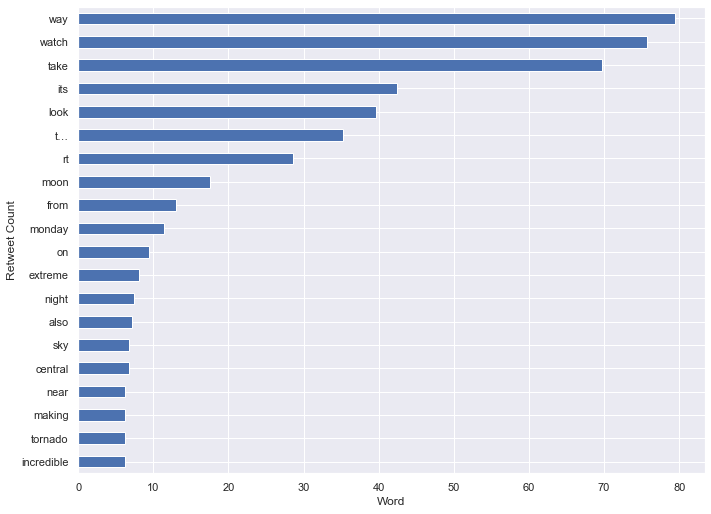

In [32]:
top_20['retweet_count'].sort_values().plot.barh(figsize=(10, 8))
plt.xlabel('Word')
plt.ylabel('Retweet Count')